##### Synthesize a classification dataset with 2 features and  class imbalance

Counter({0: 9900, 1: 100})


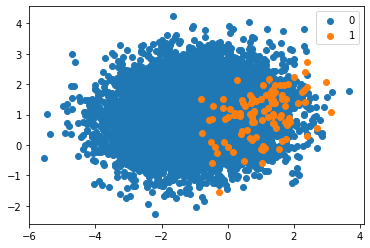

In [3]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y=0)
counter = Counter(y)
print(Counter(y))

for labelnew, _ in counter.items():
    row_idx = np.where(y == labelnew)[0]
    plt.scatter(X[row_idx,0], X[row_idx, 1], label = str(labelnew))

plt.legend()
plt.show()

Counter({0: 9900, 1: 100})


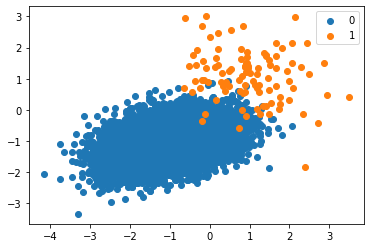

Cross val scores are 0.927


In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y=0)
counter = Counter(y)
print(Counter(y))

for labelnew, _ in counter.items():
    row_idx = np.where(y == labelnew)[0]
    plt.scatter(X[row_idx,0], X[row_idx, 1], label = str(labelnew))

plt.legend()
plt.show()

model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 3)
cross_validation = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print("Cross val scores are %.3f" %np.mean(cross_validation))

Counter({0: 9900, 1: 100})


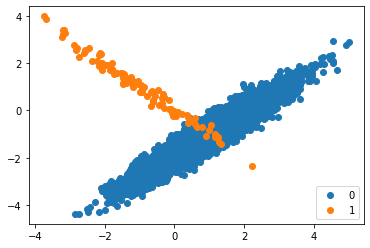

Cross val scores are 0.928


In [7]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y=0)
counter = Counter(y)
print(Counter(y))

for labelnew, _ in counter.items():
    row_idx = np.where(y == labelnew)[0]
    plt.scatter(X[row_idx,0], X[row_idx, 1], label = str(labelnew))

plt.legend()
plt.show()

model = DecisionTreeClassifier(class_weight = 'balanced')
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 3)
cross_validation = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print("Cross val scores are %.3f" %np.mean(cross_validation))

Counter({0: 9900, 1: 100})


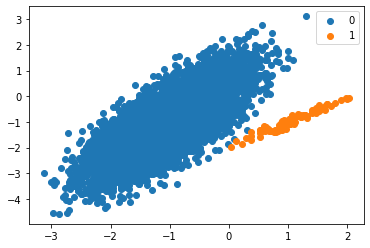

Best: 0.981599 using {'class_weight': {0: 10, 1: 1}}
0.979865 (0.027684) with: {'class_weight': {0: 100, 1: 1}}
0.981599 (0.024079) with: {'class_weight': {0: 10, 1: 1}}
0.979916 (0.027689) with: {'class_weight': {0: 1, 1: 1}}
0.979865 (0.027623) with: {'class_weight': {0: 0.1, 1: 1}}
0.974832 (0.030849) with: {'class_weight': {0: 0.01, 1: 1}}


In [8]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y=0)
counter = Counter(y)
print(Counter(y))

for labelnew, _ in counter.items():
    row_idx = np.where(y == labelnew)[0]
    plt.scatter(X[row_idx,0], X[row_idx, 1], label = str(labelnew))

plt.legend()
plt.show()

balance_weights = [{0:100, 1:1},{0:10,1:1},{0:1,1:1},{0:0.1, 1:1}, {0:0.01, 1:1}]
param_grid = dict(class_weight = balance_weights)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 3)
grid = GridSearchCV(estimator = model,param_grid = param_grid, n_jobs =-1, cv = cv, scoring = 'roc_auc' )
grid_result = grid.fit(X,y)
                      
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))